#  Exploratory Data Analysis - Sports

#  Name : Suril Shukla

# Task # 4

# Working on the IPL Dataset

### Importing the libraries 

In [451]:
import pandas as pd
import matplotlib.pyplot as  plt


### Getting the data

In [452]:
ipl_data = pd.read_csv("Documents\Datasets\matches.csv")
match_data = pd.DataFrame(ipl_data) 
ipl_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


#                         Which team has most victories ??  

In [453]:
ipl_data["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Text(0, 0.5, 'Number Of Victories')

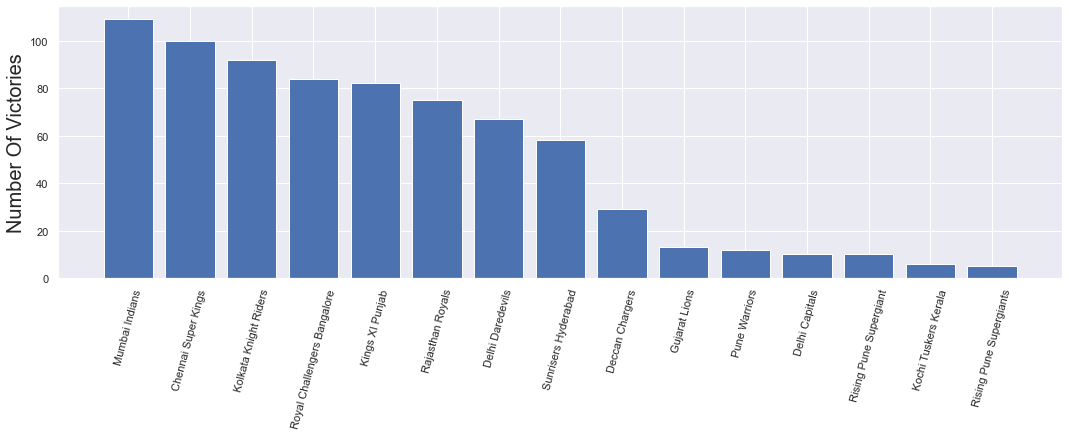

In [454]:
ax = plt.subplots(figsize=(18,5))
plt.bar(list(ipl_data["winner"].value_counts().keys()), list(ipl_data["winner"].value_counts()))
plt.xticks(rotation = 75)
plt.ylabel("Number Of Victories", fontsize = 20)

#                            Year-Wise Win-Stats for CSK 

In [455]:
ipl_data[data["winner"] == "Chennai Super Kings"]["season"].value_counts()

2013    12
2018    11
2011    11
2019    10
2015    10
2014    10
2012    10
2010     9
2008     9
2009     8
Name: season, dtype: int64

<BarContainer object of 10 artists>

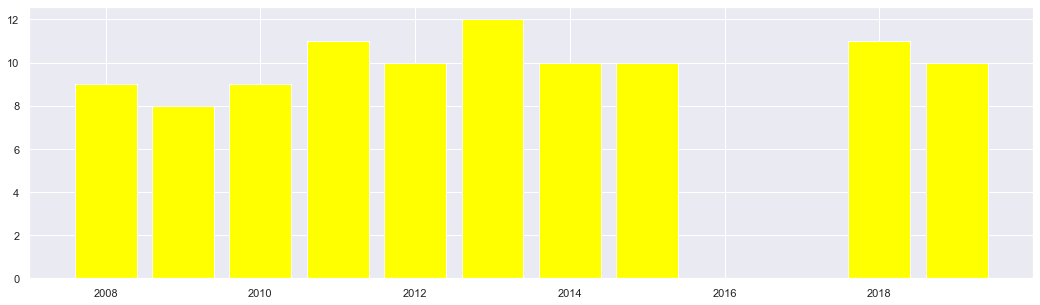

In [456]:
ax = plt.subplots(figsize=(18,5))
plt.bar(ipl_data[ipl_data["winner"] == "Chennai Super Kings"]["season"].value_counts().keys(),
        ipl_data[ipl_data["winner"] == "Chennai Super Kings"]["season"].value_counts(), color = "yellow")


Text(0.5, 1.0, 'CSK Win-Plot')

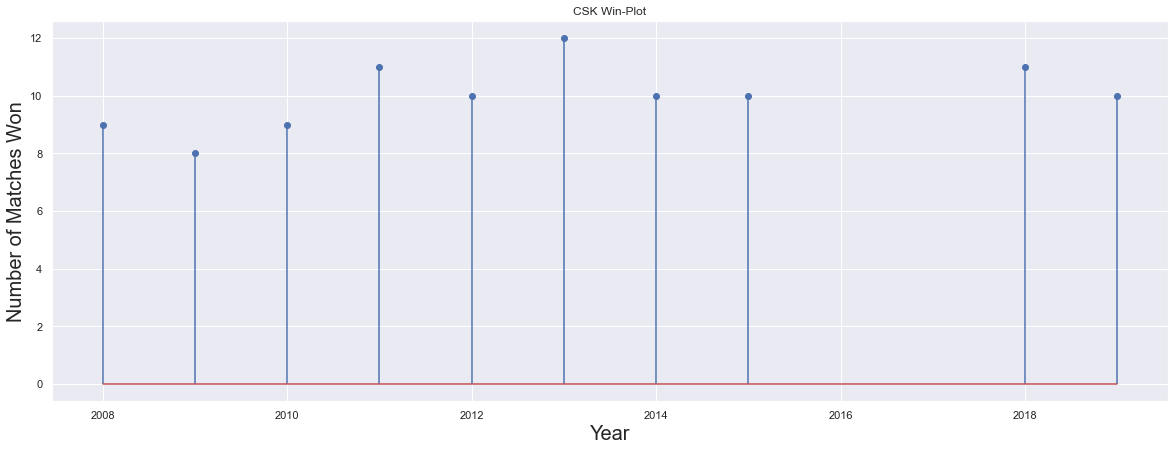

In [457]:
fx, ax = plt.subplots(figsize = (20,7))
plt.style.use('seaborn-darkgrid')
ax.stem(ipl_data[data["winner"] == "Chennai Super Kings"]["season"].value_counts().keys(), 
        ipl_data[data["winner"] == "Chennai Super Kings"]["season"].value_counts())
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Number of Matches Won", fontsize = 20)
plt.title("CSK Win-Plot")

#                  Player with Most Man of the match Award :

In [458]:
ipl_data["player_of_match"].value_counts()[0:10].keys()

Index(['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'DA Warner', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'AM Rahane'],
      dtype='object')

In [459]:
ipl_data["player_of_match"].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
AM Rahane         12
Name: player_of_match, dtype: int64

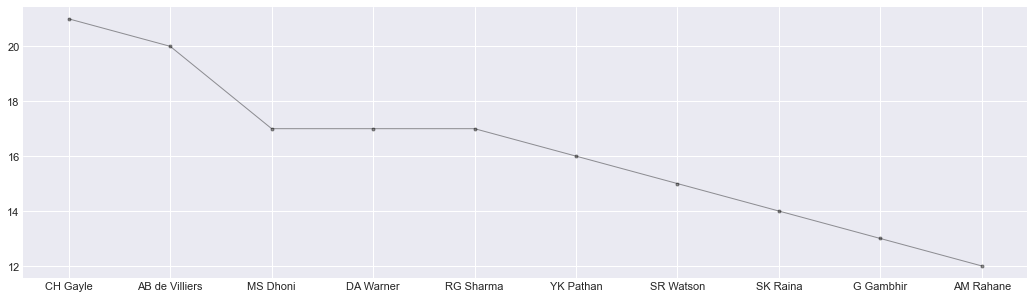

In [460]:
ax = plt.subplots(figsize=(18,5))
plt.style.use('seaborn-darkgrid')
plt.plot(list(ipl_data["player_of_match"].value_counts()[0:10].keys()), 
            list(ipl_data["player_of_match"].value_counts()[0:10]), marker='.', color='black', linewidth=1, alpha=0.4)

#                             Venue-Wise Stats for "Chris Gayle"

In [461]:
gayledata = ipl_data[ipl_data["player_of_match"]== "CH Gayle"][["player_of_match", "season", "venue"]]
gayledata.groupby("venue")["player_of_match"].value_counts().sort_values(ascending = False)

venue                                                 player_of_match
M Chinnaswamy Stadium                                 CH Gayle           9
Punjab Cricket Association IS Bindra Stadium, Mohali  CH Gayle           2
Eden Gardens                                          CH Gayle           2
Wankhede Stadium                                      CH Gayle           1
Subrata Roy Sahara Stadium                            CH Gayle           1
Sawai Mansingh Stadium                                CH Gayle           1
Saurashtra Cricket Association Stadium                CH Gayle           1
Punjab Cricket Association Stadium, Mohali            CH Gayle           1
MA Chidambaram Stadium, Chepauk                       CH Gayle           1
Kingsmead                                             CH Gayle           1
Feroz Shah Kotla                                      CH Gayle           1
Name: player_of_match, dtype: int64

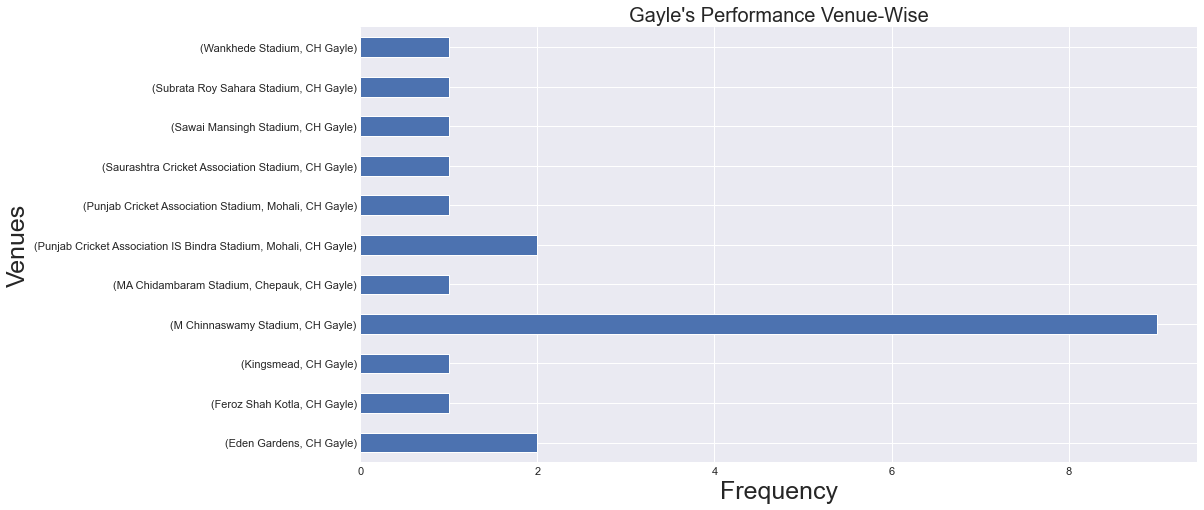

In [462]:
gayledata.groupby("venue")["player_of_match"].value_counts().plot(kind = "barh", figsize = (15,8), stacked = False)
plt.title("Gayle's Performance Venue-Wise", fontsize = 20)
plt.xlabel("Frequency", fontsize = 25)
plt.ylabel("Venues",fontsize = 25)
plt.show()

#                                   Most Used Stadium 

In [463]:
ipl_data["venue"].value_counts()[0:10]

Eden Gardens                                  77
M Chinnaswamy Stadium                         73
Wankhede Stadium                              73
Feroz Shah Kotla                              67
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: venue, dtype: int64

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



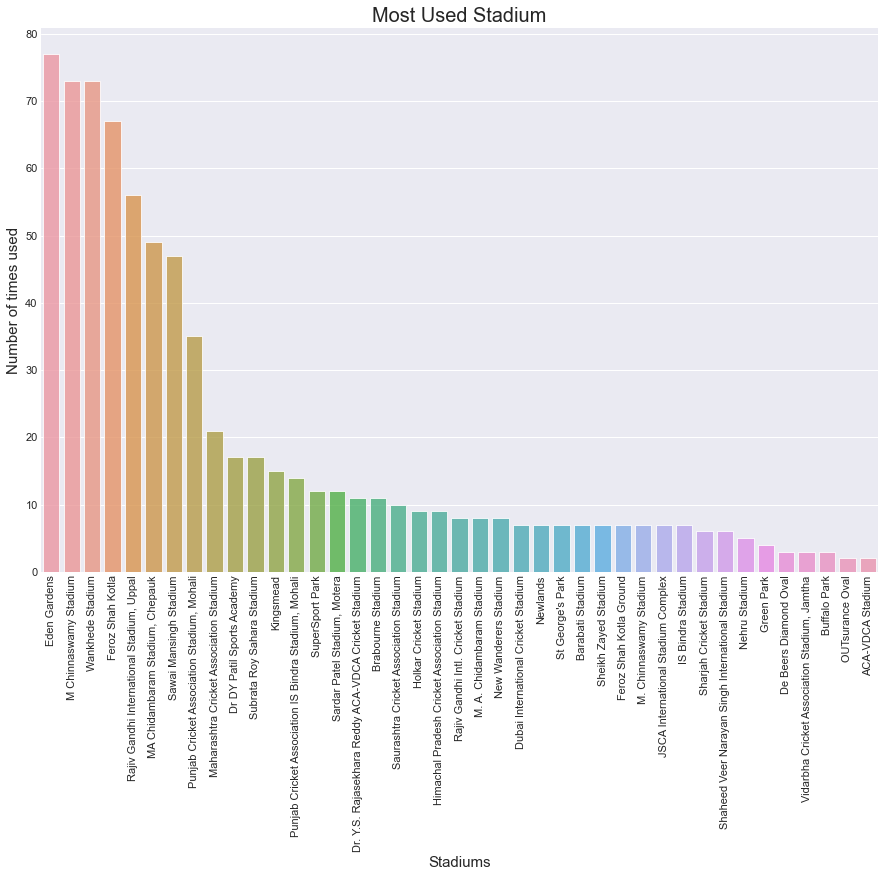

In [464]:
import seaborn as sns
sns.set_style("darkgrid")
stadium = ipl_data["venue"].value_counts().sort_values(ascending = False)
ax = plt.subplots(figsize = (15,10))
stad_var = sns.barplot(stadium.index, stadium.values, alpha = 0.8)
plt.title("Most Used Stadium", fontsize = 20)
plt.xlabel("Stadiums", fontsize = 15)
plt.ylabel("Number of times used", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

#        Win Ratio for First / Second Innings in Wankhede Stadium

In [465]:
batting_firstin_wankhede = ipl_data[ipl_data["venue"]=="Wankhede Stadium"]
batting_firstin_wankhede = batting_firstin_wankhede[batting_firstin_wankhede["win_by_runs"] > 0]["winner"].value_counts().sum()
batting_firstin_wankhede

35

In [466]:
batting_secondin_wankhede = ipl_data[ipl_data["venue"]=="Wankhede Stadium"]
batting_secondin_wankhede = batting_secondin_wankhede[batting_secondin_wankhede["win_by_wickets"] > 0]["winner"].value_counts().sum()
batting_secondin_wankhede

37

In [467]:
import plotly.express as px
df = [35, 37]
values = ["Batting_First", "Batting_Second"]
colors = ["Cyan", "royalblue"]
fig = px.pie(df,values = df , names = values, color = colors)
fig.show()

In [468]:
deliveries_data = pd.read_csv("Documents\Datasets\deliveries.csv")
deliveries_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


#                                  Most Runs Scored In IPL

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



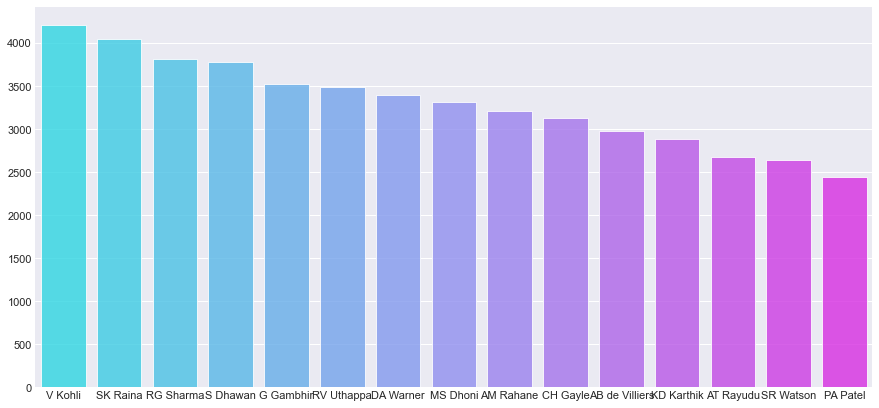

In [469]:
batsmen_data = deliveries_data["batsman"].value_counts()[0:15].sort_values(ascending = False)
ax = plt.subplots(figsize = (15,7))
sns.barplot(batsmen_data.index, batsmen_data.values, alpha=0.8, palette = "cool")
plt.show()

In [470]:
batsman_list = deliveries_data.groupby(["batsman"])
batsman = batsman_list["batsman_runs"].sum().reset_index()
batsman

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
511,YV Takawale,192
512,Yashpal Singh,47
513,Younis Khan,3
514,Yuvraj Singh,2765


In [471]:
type(batsman)

pandas.core.frame.DataFrame

In [472]:
batsman = batsman.sort_values(by = ["batsman_runs"], ascending =False)[0:10]
batsman

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='batsman', ylabel='batsman_runs'>

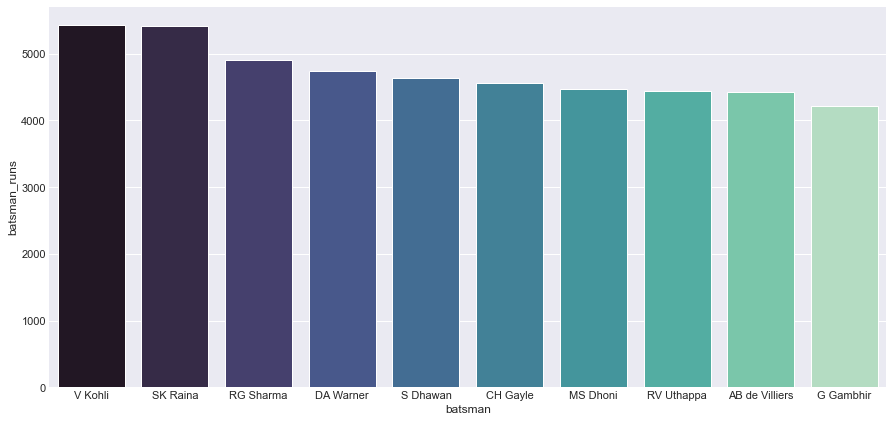

In [473]:
ac = plt.subplots(figsize = (15,7))
sns.barplot(batsman["batsman"], batsman["batsman_runs"], data = batsman, palette = "mako")

#                 Stats for Winning the Match if you won the toss 

In [474]:
win_count = 0
for index, value in ipl_data.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print('The number of times the team winning toss have won:{}' .format(win_count))
prob = win_count/len(ipl_data)
print('The probability of winning if won the toss: {}' .format(prob))

The number of times the team winning toss have won:393
The probability of winning if won the toss: 0.5198412698412699


#                           Plot for Types of Wickets

In [475]:
wicket_type =deliveries_data["dismissal_kind"].value_counts()
wicket_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'stumped'),
  Text(5, 0, 'caught and bowled'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

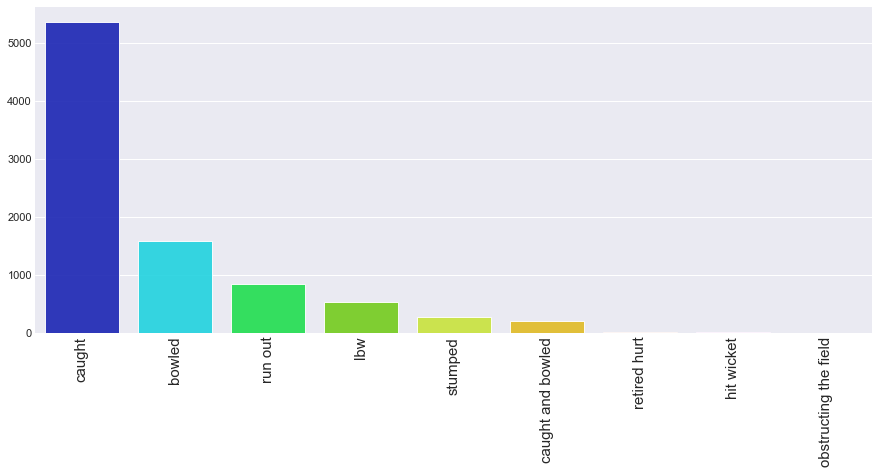

In [493]:
ax = plt.subplots(figsize = (15, 6))
sns.barplot(wicket_type.index, wicket_type.values, alpha = 0.9, palette = "gist_ncar")
plt.xticks(rotation = 90, size = 15)

#                                    Most Wickets- Takers

In [477]:
bowlers = deliveries_data[['bowler','dismissal_kind']]
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers = bowlers[(bowlers.no_wickets>=100)]
bowlers.head()

,bowler,no_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147


C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bowler', ylabel='no_wickets'>

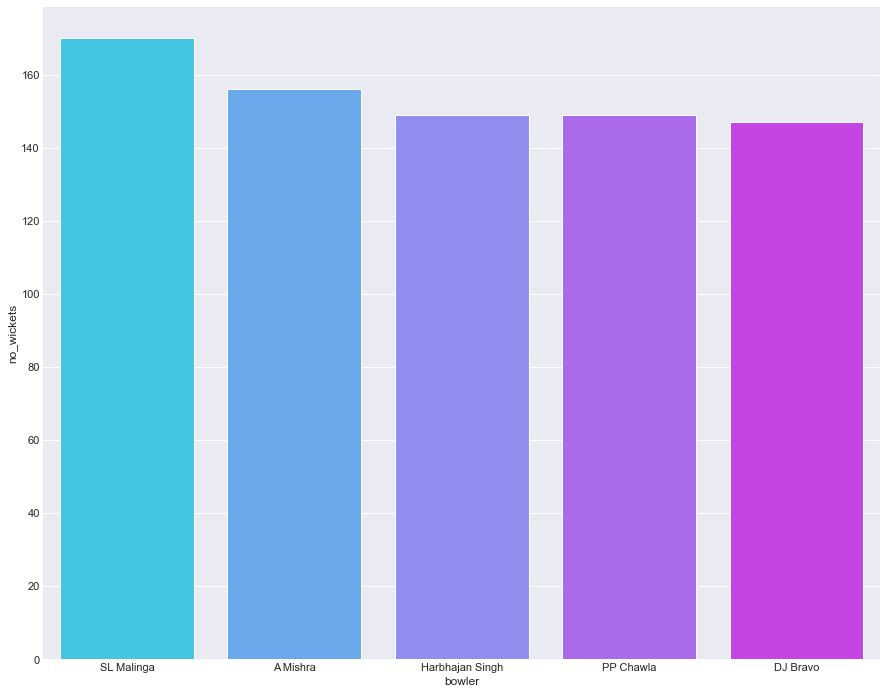

In [478]:
a = plt.subplots(figsize = (15,12))
sns.barplot( bowlers["bowler"].head(), bowlers["no_wickets"], data = bowlers, palette = "cool")

#                       Most Successful Bowler for RCB

In [480]:
rcb_bowlers =deliveries_data[deliveries_data["bowling_team"]== "Royal Challengers Bangalore"]
rcb_bowlers

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177511,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177512,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177513,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,KS Williamson,B Kumar,UT Yadav,0,...,0,0,1,0,3,1,4,NaN,NaN,NaN
177514,11345,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,6,KS Williamson,B Kumar,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [481]:
rcb_bowler = rcb_bowlers[["bowler", "dismissal_kind"]]
rcb_bowler

,bowler,dismissal_kind
0,TS Mills,NaN
1,TS Mills,NaN
2,TS Mills,NaN
3,TS Mills,NaN
4,TS Mills,NaN
...,...,...
177511,UT Yadav,NaN
177512,UT Yadav,NaN
177513,UT Yadav,NaN
177514,UT Yadav,NaN


In [482]:
rcb_bowler = rcb_bowler[(rcb_bowler.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
rcb_bowler = rcb_bowler.groupby("bowler").count().reset_index()
rcb_bowler.rename(columns = {"dismissal_kind" : "no. of wickets"}, inplace = True)
rcb_bowler = rcb_bowler.sort_values(by = ["no. of wickets"], ascending = False)
rcb_bowler[0:8]

,bowler,no. of wickets
69,YS Chahal,100
51,R Vinay Kumar,72
71,Z Khan,49
1,A Kumble,45
54,S Aravind,45
44,P Kumar,34
22,HV Patel,34
38,MA Starc,34


C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='bowler', ylabel='no. of wickets'>

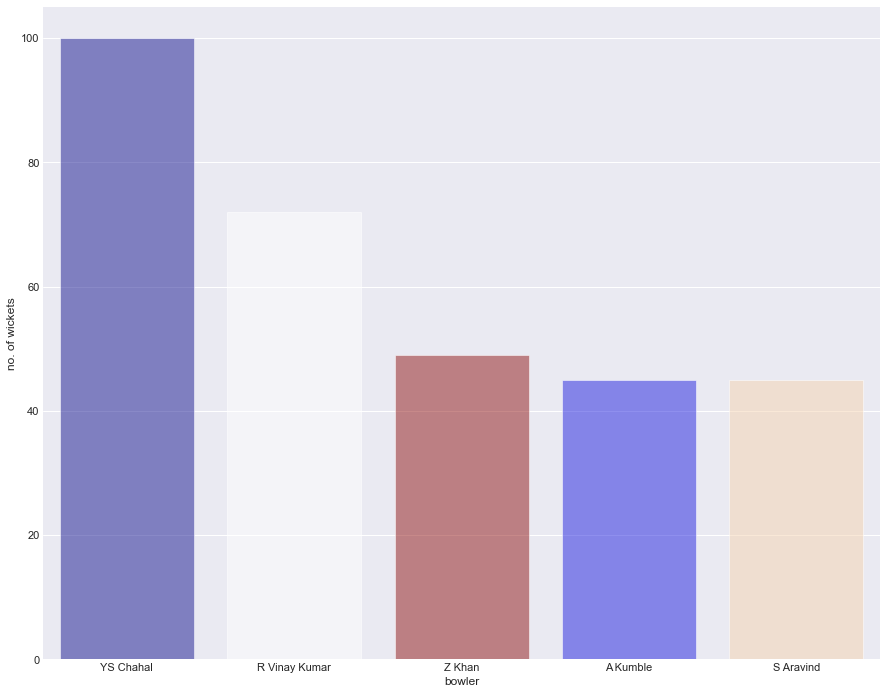

In [483]:
a = plt.subplots(figsize = (15,12))
sns.barplot(rcb_bowler["bowler"][0:5], rcb_bowler["no. of wickets"],alpha = 0.5, palette = "flag" )

##               Team-wise Distribution to choose Bat / Field after winning Toss 

C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

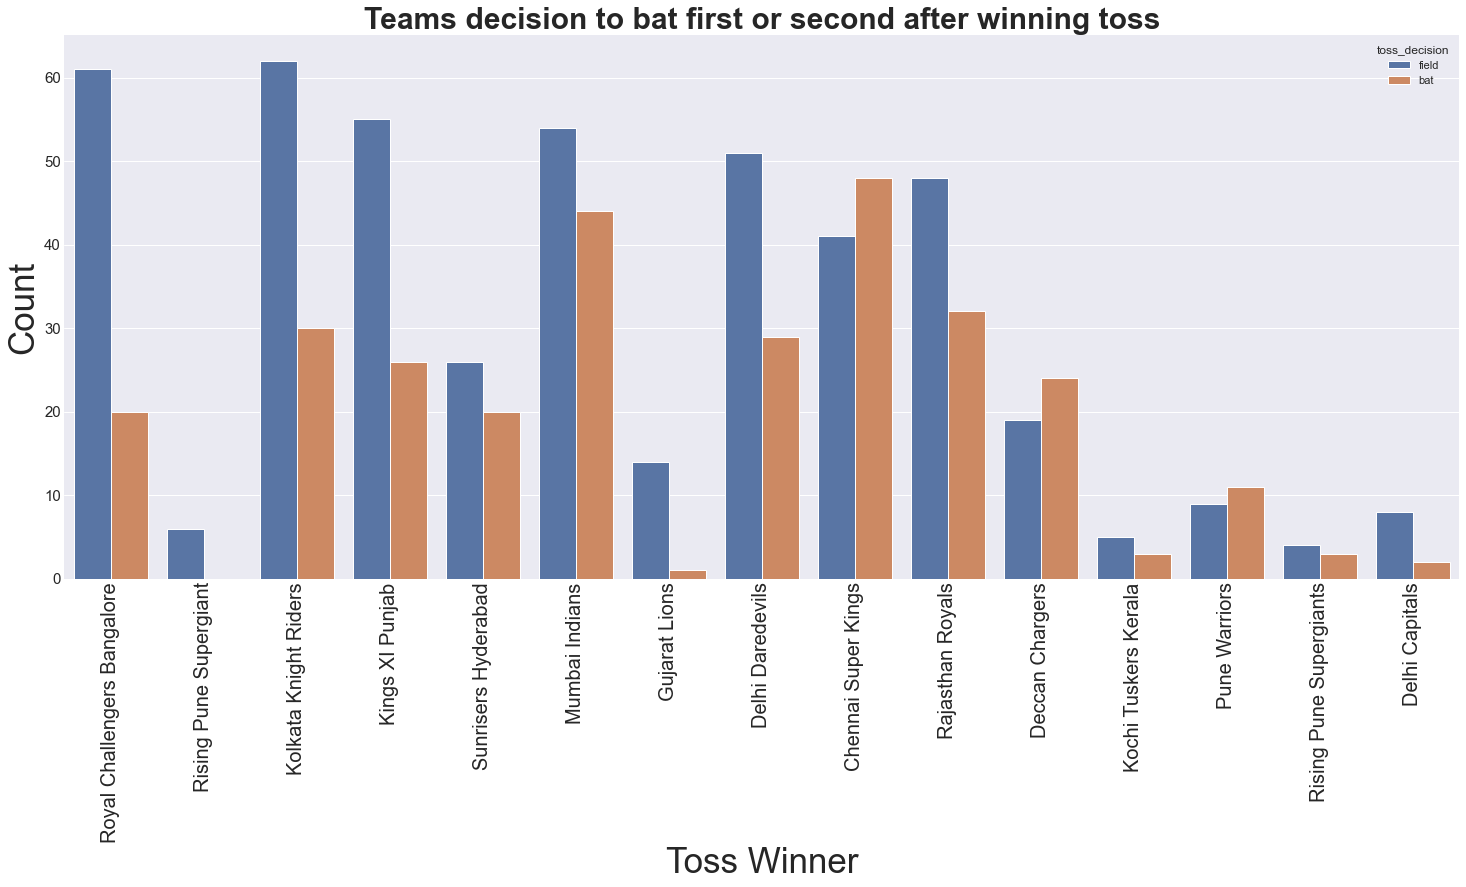

In [484]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = ipl_data, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)
plt.xticks(rotation = 90, size = 20)

#                              Most Consistent Batsmen

In [485]:
mixed = pd.merge(deliveries_data,ipl_data, left_on='match_id', right_on ='id')


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

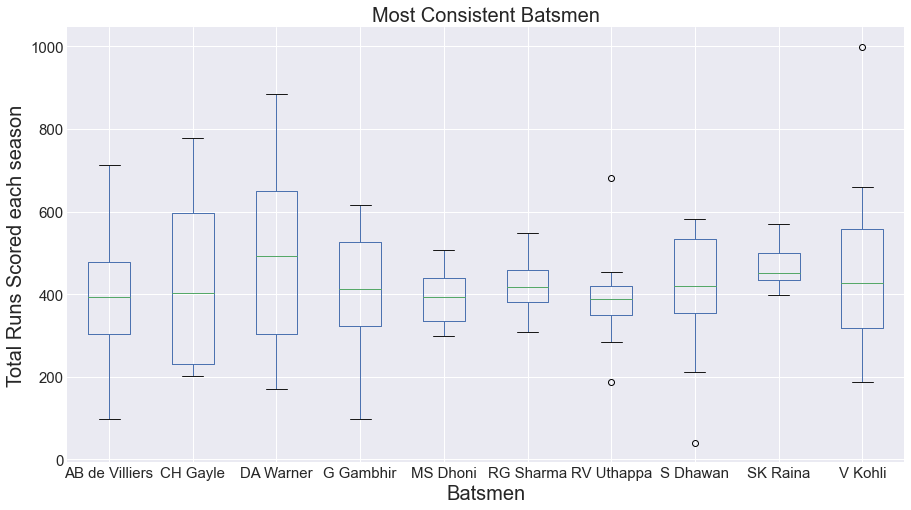

In [486]:
consistency = mixed[mixed.batsman.isin([ 'V Kohli','SK Raina','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistency.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent Batsmen", fontsize = 20)
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored each season", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

#                                   Highest Average Batsmen

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

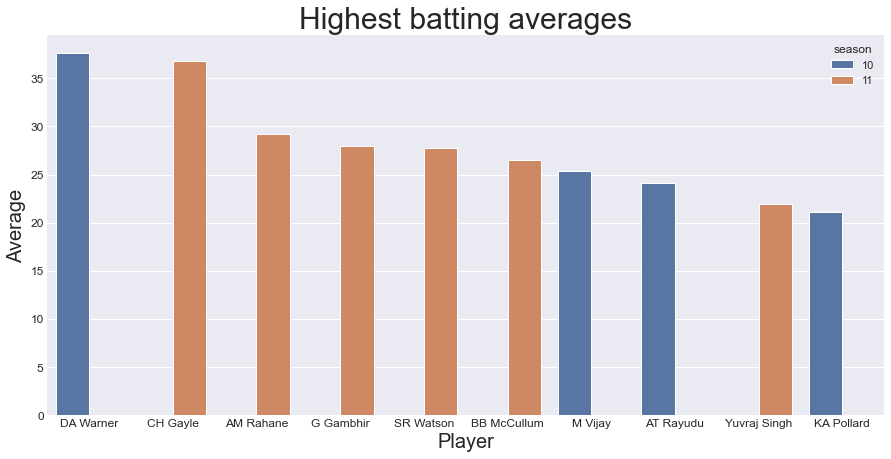

In [487]:
total_matches = pd.DataFrame(mixed.groupby('batsman')['match_id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(mixed.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(mixed.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_data = pd.DataFrame({'match':total_matches['match_id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_data.reset_index(inplace = True)

batsman_data['batting_average'] = batsman_data['run']/batsman_data['match']
high_avg = batsman_data[batsman_data['season'].isin([10,11])][['season','batsman','batting_average']].sort_values(by = 'batting_average',ascending = False).head(10)
plt.figure(figsize = (15,7))
sns.barplot(x='batsman', y='batting_average', data = high_avg, hue = 'season')
plt.title("Highest batting averages",fontsize= 30)
plt.xlabel("Player", size = 20)
plt.ylabel("Average", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

#                                      Best Economy-wise Bowlers

In [488]:
runs_given = pd.DataFrame(mixed.groupby('bowler')['batsman_runs'].sum())
balls_bowled = pd.DataFrame(mixed.groupby('bowler')['ball'].count())
overs_bowled = balls_bowled['ball']/6
wickets_taken = pd.DataFrame(mixed[mixed['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(mixed.groupby('bowler')['season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_runs'],'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)

In [489]:
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
x=best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)
best_economy_rate.head(10).style.apply(lambda x: ['background: lightgreen' if x.name in [106,315,253]else '' for i in x], axis=1)
x.head(10)

,bowler,runs,balls,wickets,season,overs,economy_rate
108,DW Steyn,2283,2207,104,10,367.833333,6.206615
207,M Muralitharan,1642,1581,67,7,263.500000,6.231499
291,RN ten Doeschate,88,83,3,5,13.833333,6.361446
286,RE van der Merwe,486,455,25,5,75.833333,6.408791
269,R Ashwin,3224,3016,138,10,502.666667,6.413793
340,SL Malinga,3218,2974,188,9,495.666667,6.492266
347,SP Narine,2825,2600,137,8,433.333333,6.519231
138,J Botha,781,709,27,5,118.166667,6.609309
101,DL Vettori,870,785,34,5,130.833333,6.649682
126,Harbhajan Singh,3880,3451,161,12,575.166667,6.745871


C:\Users\ADMIN\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Best Economy_Wise Bowlers')

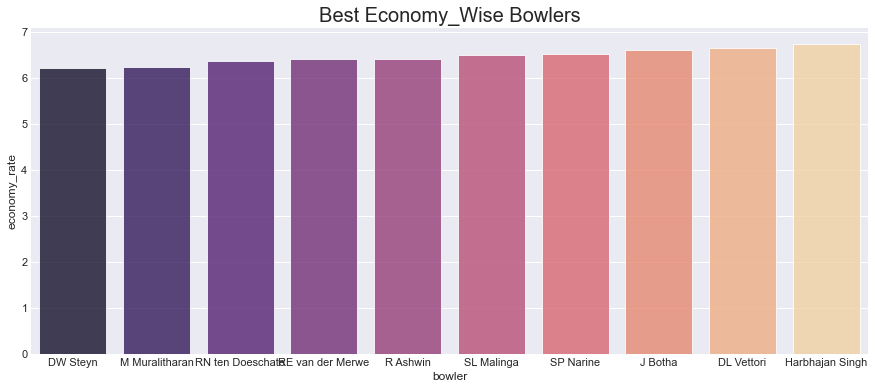

In [490]:
ax = plt.subplots(figsize = (15, 6))
sns.barplot(x["bowler"].head(10),x["economy_rate"] , alpha = 0.8, palette = "magma")
plt.title("Best Economy_Wise Bowlers", size = 20)

#                                      Most Frequent Umpire

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'HDPK Dharmasena'),
  Text(0, 2, 'C Shamshuddin'),
  Text(0, 3, 'AK Chaudhary'),
  Text(0, 4, 'SJA Taufel'),
  Text(0, 5, 'M Erasmus'),
  Text(0, 6, 'Asad Rauf'),
  Text(0, 7, 'Nitin Menon'),
  Text(0, 8, 'BR Doctrove'),
  Text(0, 9, 'RE Koertzen')])

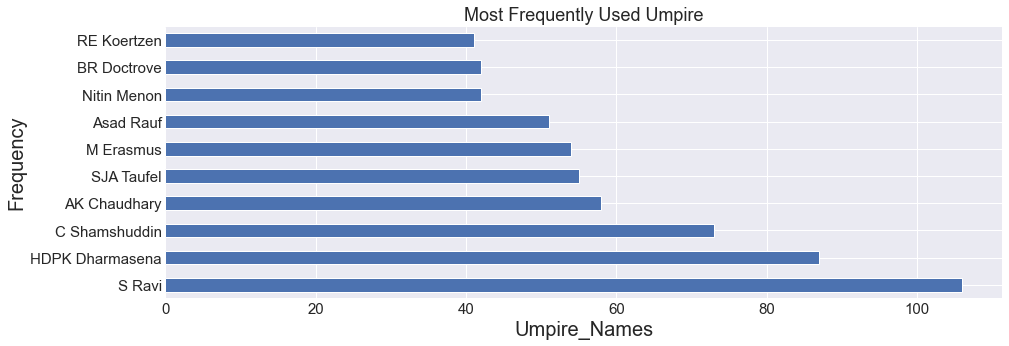

In [491]:
umpires = pd.concat([ipl_data.umpire1,ipl_data.umpire2], ignore_index=True)
umpires = pd.DataFrame(umpires, columns = ['umpire_name'])

umpires['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Most Frequently Used Umpire",fontsize=18)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Umpire_Names", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

# Final Conclusions:

### > Mumbai Indians are the most successful team in IPL till now.
### > Stats-wise 2013 was the most successful year for Chennai Super Kings
### > Christopher Gayle has been most awarded "Man of the Match"
### > CH Gayle has been most successful in M Chinnaswamy Stadium (Bangalore)
### > Eden Garden is the most used stadium 
### > 60% of the times teams choose batting after winning toss
### > Wankhede Stadium is Chasing Stadium as Second Innings wins 51.4% of the time
### > Virat Kohli has scored most runs in IPL
### > In list of most runs scorers, only MS Dhoni & AB De Villers are not opening batsman.
### > L Malinga has taken most wickets
### > For RCB, Yuzi Chahal is the most successful bowler
### > CSK is the only team, who opts to bat first mostly
### > Suresh Raina has been Most Consistent Batsman.
### > DA Warner has the most highest Average 
### > Dale Steyn has the best economy in IPL
### > S Ravi is the most used umpire

#                                          Thanks for Watching 